In [1]:
from fastai.data.block import *
from fastai.vision.augment import *
from fastai.vision.data import *
from fastai.data.transforms import *
from fastai.vision.learner import *
from fastai.vision.models import resnet18
from fastai.metrics import error_rate
from fastai.interpret import *
from fastai.vision.core import *
from pathlib import Path
import ipywidgets as widgets

In [2]:
path=Path('/notebooks/storage/data/camo')

In [3]:
db=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))
dls=db.dataloaders(path)

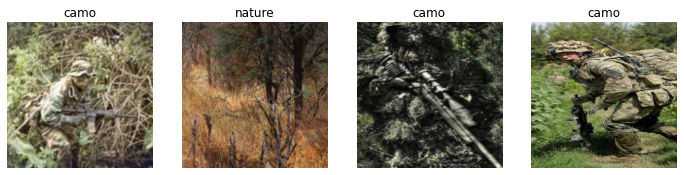

In [4]:
dls.valid.show_batch (max_n=4, nrows=1)

In [5]:
db=db.new(
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=2))
dls=db.dataloaders(path)

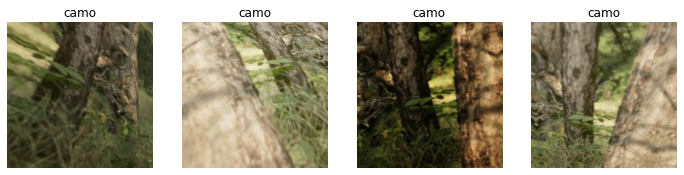

In [6]:
dls.train.show_batch (max_n=4, nrows=1, unique=True)

In [7]:
learn=cnn_learner(dls, resnet18, metrics=error_rate)
learn.fit(4)

[0, 1.1164103746414185, 0.24823063611984253, 0.09375, '00:02']
[1, 0.9012867212295532, 0.1108713373541832, 0.03125, '00:01']
[2, 0.763124942779541, 0.055136002600193024, 0.0, '00:01']
[3, 0.6361600160598755, 0.05789881944656372, 0.03125, '00:01']


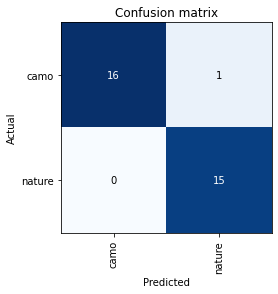

In [8]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

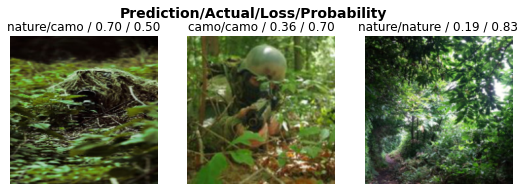

In [9]:
interp.plot_top_losses(3,nrows=1)

In [10]:
learn.export("model20201018")

In [11]:
btn_upload=widgets.FileUpload()
btn_run=widgets.Button(description='Clasificar')
out_pl=widgets.Output()
lbl_pred=widgets.Label()

def on_click_classify(change):
    img=PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128,128))
    pred, pred_idx, probs=learn.predict(img)
    lbl_pred.value=f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
widgets.VBox([widgets.Label('Seleccione una imagen'), btn_upload, btn_run, out_pl, lbl_pred])